# Heart Disease Risk Prediction: Logistic Regression Homework

In [37]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Step 1: Load and Prepare the Dataset

In [38]:
import pandas as pd

df = pd.read_csv('Heart_Disease_Prediction.csv')
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [39]:
# Estadísticas descriptivas para todas las columnas
print(df.describe().T)

                         count        mean        std    min    25%    50%  \
Age                      270.0   54.433333   9.109067   29.0   48.0   55.0   
Sex                      270.0    0.677778   0.468195    0.0    0.0    1.0   
Chest pain type          270.0    3.174074   0.950090    1.0    3.0    3.0   
BP                       270.0  131.344444  17.861608   94.0  120.0  130.0   
Cholesterol              270.0  249.659259  51.686237  126.0  213.0  245.0   
FBS over 120             270.0    0.148148   0.355906    0.0    0.0    0.0   
EKG results              270.0    1.022222   0.997891    0.0    0.0    2.0   
Max HR                   270.0  149.677778  23.165717   71.0  133.0  153.5   
Exercise angina          270.0    0.329630   0.470952    0.0    0.0    0.0   
ST depression            270.0    1.050000   1.145210    0.0    0.0    0.8   
Slope of ST              270.0    1.585185   0.614390    1.0    1.0    2.0   
Number of vessels fluro  270.0    0.670370   0.943896    0.0    

In [40]:
print(df.columns.tolist())

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


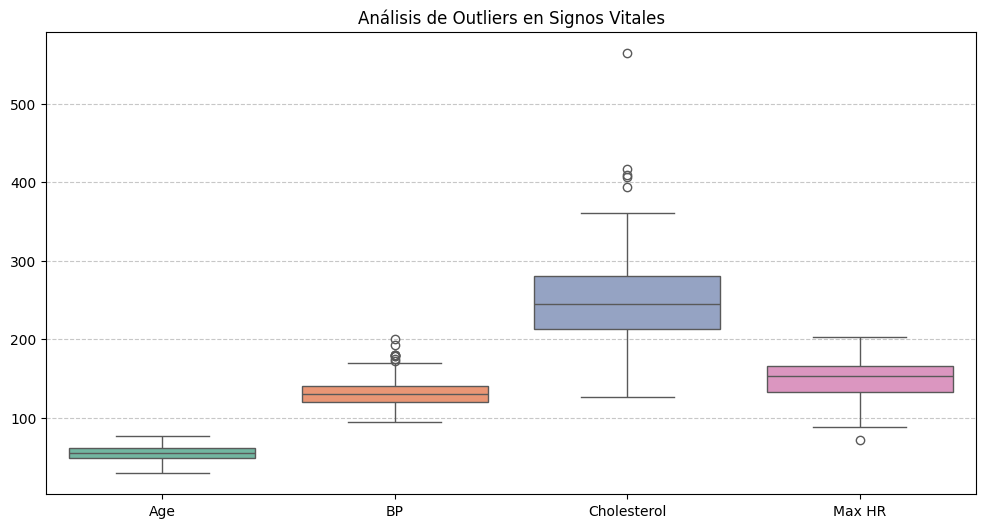

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usando los nombres exactos de tu lista
cols_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_plot], palette="Set2")
plt.title("Análisis de Outliers en Signos Vitales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

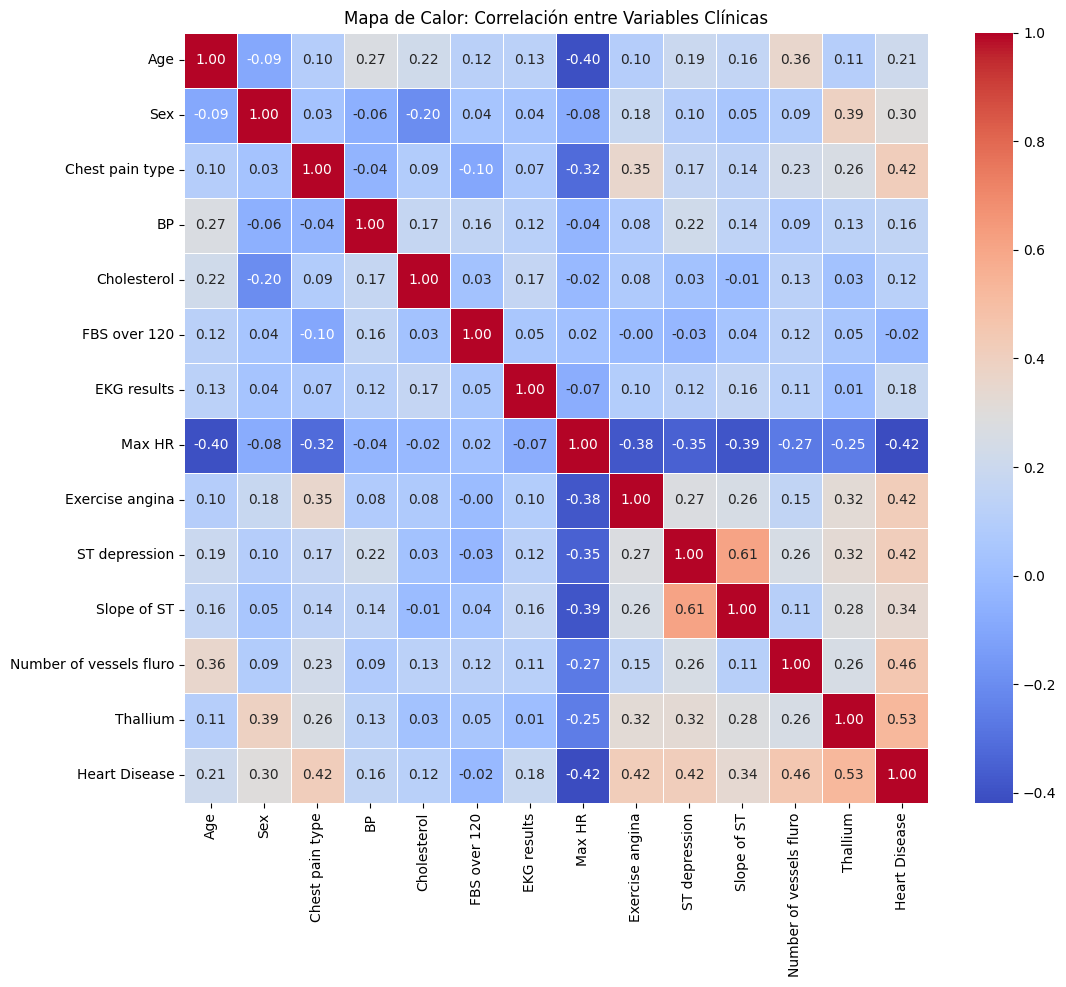

In [42]:
plt.figure(figsize=(12, 10))
# Calculamos la correlación de todas las variables
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor: Correlación entre Variables Clínicas")
plt.show()

In [43]:
import numpy as np

# Definir variables
features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[features].values
y = df['Heart Disease'].values

# Separar índices por clase
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

# Barajar índices
np.random.seed(42)
np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

# Calcular puntos de corte para el 70%
cut_0 = int(len(idx_0) * 0.7)
cut_1 = int(len(idx_1) * 0.7)

# Unir índices para Train y Test
train_idx = np.concatenate([idx_0[:cut_0], idx_1[:cut_1]])
test_idx = np.concatenate([idx_0[cut_0:], idx_1[cut_1:]])

# Crear los sets finales
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Pruebas: {X_test.shape[0]} muestras")

Entrenamiento: 189 muestras
Pruebas: 81 muestras


## Step 2: Implement Basic Logistic Regression

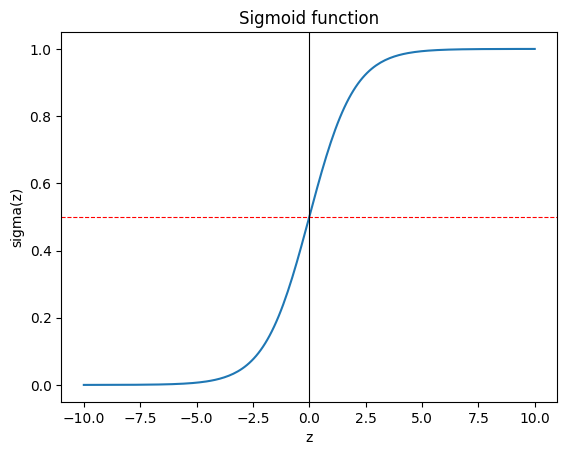

In [44]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))


# Visualize the sigmoid function
z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure()
plt.plot(z_values, sig_values)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.ylim(-0.05, 1.05)
plt.axhline(0.5, color="red", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

In [45]:
def compute_cost(w, b, X, y):
    """Compute logistic regression cost J(w, b) using explicit model."""
    m, n = X.shape

    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)

    # To avoid log(0), clip probabilities
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J


# Quick test on linear dataset with zero parameters
w_test = np.zeros(X.shape[1])
b_test = 0.0
J_test = compute_cost(w_test, b_test, X_train, y_train)
J_test

np.float64(0.6931471805599453)

In [46]:
def compute_gradient(w, b, X, y):
    """Compute gradients dJ/dw and dJ/db with explicit model."""
    m, n = X.shape

    # f_{w,b}^{(i)}(x^{(i)})
    z = X @ w + b
    f = sigmoid(z)

    error = f - y  # e^{(i)} = f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db


# Quick test
dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_train, y_train)
dj_dw_test, dj_db_test

(array([ 2.25925926, 11.85714286,  6.31481481, 13.02116402, -0.16613757,
        -0.16931217]),
 np.float64(0.05555555555555555))

In [47]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history


# Train on the linear dataset
m_lin, n_lin = X_train.shape
w0 = np.zeros(n_lin)
b0 = 0.0

# Asegúrate de usar los datos normalizados
X_train_final = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Baja el alpha significativamente
alpha = 0.01 
num_iters = 1000

w_trained, b_trained, J_hist = gradient_descent(
    X_train_final, y_train, w0, b0, alpha, num_iters, print_every=100
)

w_trained, b_trained

Iteration    0: J(w, b) = 0.6916
Iteration  100: J(w, b) = 0.5932
Iteration  200: J(w, b) = 0.5501
Iteration  300: J(w, b) = 0.5277
Iteration  400: J(w, b) = 0.5145
Iteration  500: J(w, b) = 0.5060
Iteration  600: J(w, b) = 0.5002
Iteration  700: J(w, b) = 0.4960
Iteration  800: J(w, b) = 0.4929
Iteration  900: J(w, b) = 0.4905
Iteration  999: J(w, b) = 0.4887


(array([-0.07188915,  0.09333729,  0.10392364, -0.57740194,  0.56125769,
         0.7631357 ]),
 np.float64(-0.187852731997005))

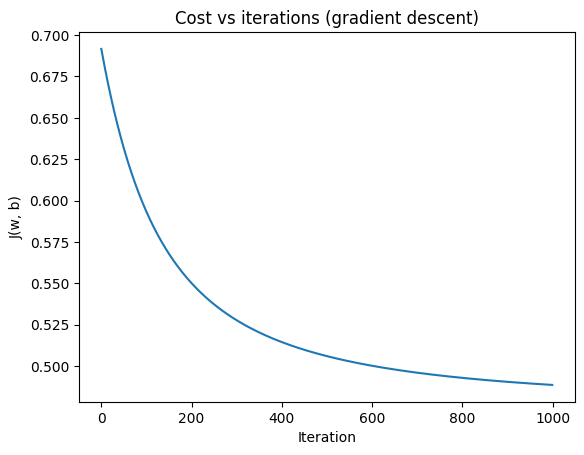

In [48]:
plt.figure()
plt.plot(J_hist)
plt.title("Cost vs iterations (gradient descent)")
plt.xlabel("Iteration")
plt.ylabel("J(w, b)")
plt.show()